**INTRODUCCION**  

La salud mental es un aspecto clave del bienestar humano y su prevención resulta fundamental. Mediante el análisis de datos es posible identificar patrones y evaluar riesgos de forma temprana.
En la actualidad, los problemas de salud mental representan un desafío creciente a nivel social, laboral y educativo. Contar con herramientas que permitan anticipar posibles riesgos no solo ayuda a comprender mejor las causas y factores asociados, sino que también facilita la implementación de estrategias preventivas y de acompañamiento oportuno.


**OBJETIVO**  

El objetivo principal de este proyecto es analizar un dataset de salud mental para construir un modelo que clasifique el riesgo en niveles Bajo, Medio o Alto, contribuyendo así a la comprensión de los factores que influyen en la salud mental y ofreciendo información que pueda ser utilizada para la prevención y el apoyo a la toma de decisiones.  


**DESCRIPCION DE VARIABLES**  

A partir del análisis realizado y de la investigación previa, el dataset utilizado en este proyecto se considera relevante para evaluar el riesgo de salud mental. A continuación, se describen las variables más importantes:

Variable Objetivo:  

* mental_health_risk: Clasifica el riesgo de salud mental en niveles Low, Medium o High.


Numéricas:

* age: Edad en años.  
* stress_level: Nivel de estrés percibido por el participante.  
* sleep_hours : Cantidad promedio de horas de sueño por noche.  
* physical_activity_days: Cantidad de días de actividad física por semana.  
* depression_score : Puntaje que mide síntomas de depresión.  
* anxiety_score : Puntaje que mide síntomas de ansiedad.  
* social_support_score: Puntaje que indica nivel de soporte social percibido.  
* productivity_score: Puntaje que refleja productividad laboral o académica.

Categóricas:

* gender: Género del participante (Male, Female, Non-binary, Prefer not to say).
* employment_status: Estado laboral del participante (Employed, Student, Self-employed, Unemployed).
* work_environment: Tipo de ambiente laboral (On-Site, Remote, Hybrid).
* mental_health_history: Indica si el participante tiene historial de problemas de salud mental.
* seeks_treatment: Señala si el participante busca tratamiento o apoyo relacionado con la salud mental.

**HIPOTESIS**

1 - Existe una relación entre el nivel de estrés y la cantidad de días de ejercicio.  
2 - Se espera que las personas duerman entre 6 y 8 horas por noche.  
3 - El nivel de ansiedad cambia según el tipo de entorno laboral.  
4 - Se busca identificar qué variables del dataset están relacionadas con el riesgo de salud mental.  
5 - Las personas con riesgo de salud mental alto y medio buscan tratamiento con mayor frecuencia que las personas con riesgo bajo  

**ANALISIS EXPLORATORIO Y VISUALIZACIONES**  

En primer lugar, importaremos las librerías que utilizaremos para el análisis de datos, como pandas y numpy para la manipulación de datos, y matplotlib y seaborn para la visualización. A continuación, cargaremos el dataset salud_mental.csv (disponible en Kaggle) para comenzar con el análisis. El objetivo inicial será explorar las variables del dataset, observar sus características principales y detectar posibles valores nulos o inconsistencias, de manera de tener una idea clara de la información disponible y de los análisis que se podrán realizar posteriormente.

**NOTA:** 

Este análisis se realiza en Jupyter Notebook usando el archivo `salud_mental.csv`.  
Asegúrese de que el archivo esté en la misma carpeta que este notebook, o modifique la ruta en `pd.read_csv()` según corresponda.




In [4]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del Dataset
df = pd.read_csv("salud_mental.csv")

# Vista preliminar del Dataset
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [25]:
#Resumen de columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [14]:
# Detectar valores nulos
df.isnull().sum()

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

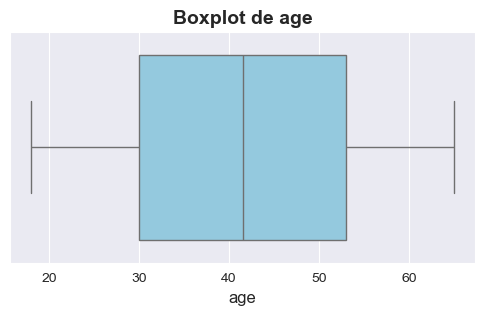

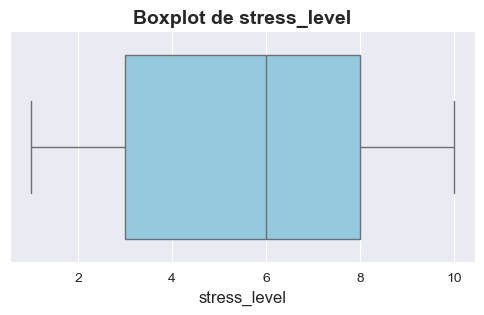

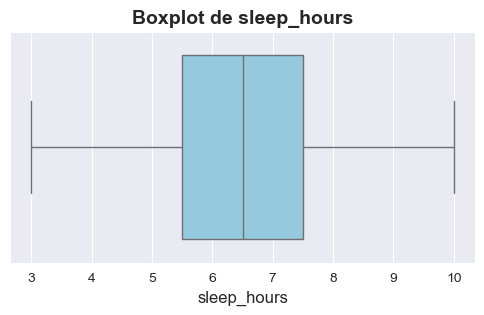

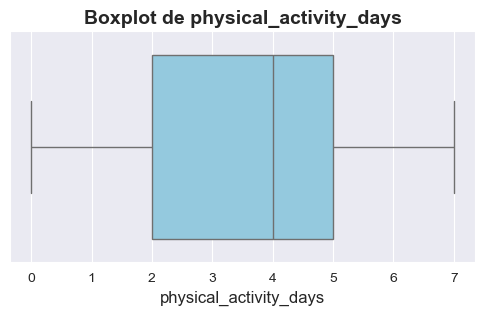

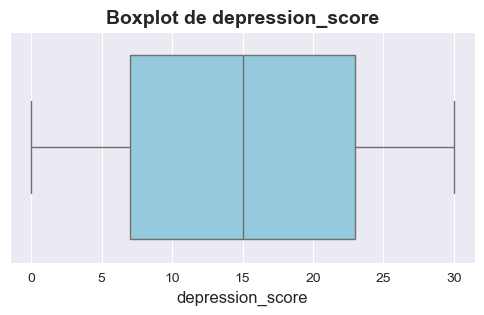

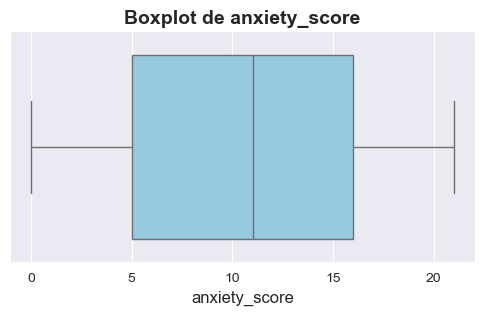

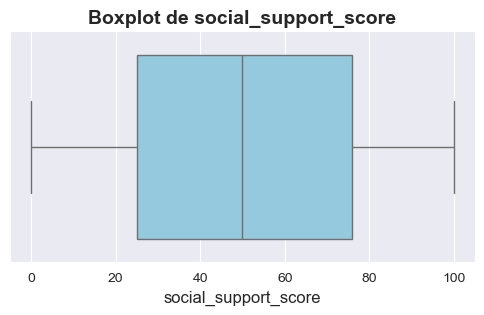

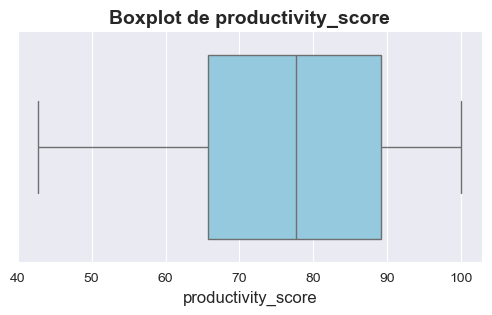

In [29]:
# Detectar posibles outliers
numericas = df.select_dtypes(include=['int64','float64']).columns

sns.set_style("darkgrid")

for col in numericas:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.show()


In [30]:
# Resumen estadístico de las variables numéricas
df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


In [24]:
# Resumen estadístico de las variables categóricas
print(df['gender'].value_counts(), "\n")
print(df['employment_status'].value_counts(), "\n")
print(df['work_environment'].value_counts(), "\n")
print(df['mental_health_history'].value_counts(), "\n")
print(df['seeks_treatment'].value_counts(), "\n")
print(df['mental_health_risk'].value_counts(), "\n")


gender
Male                 4557
Female               4457
Non-binary            520
Prefer not to say     466
Name: count, dtype: int64 

employment_status
Employed         5868
Student          2043
Self-employed    1045
Unemployed       1044
Name: count, dtype: int64 

work_environment
On-site    5044
Remote     3009
Hybrid     1947
Name: count, dtype: int64 

mental_health_history
No     6969
Yes    3031
Name: count, dtype: int64 

seeks_treatment
No     6012
Yes    3988
Name: count, dtype: int64 

mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64 



**ANALISIS HIPOTESIS  1**  

**Existe una relación entre el nivel de estrés y la cantidad de días de ejercicio.**    

Al analizar los datos se observa que personas con cualquier cantidad de actividad física pueden tener niveles de estrés del 1 al 10, por lo que la actividad física no garantiza niveles de estrés bajos y la relación es débil o nula.

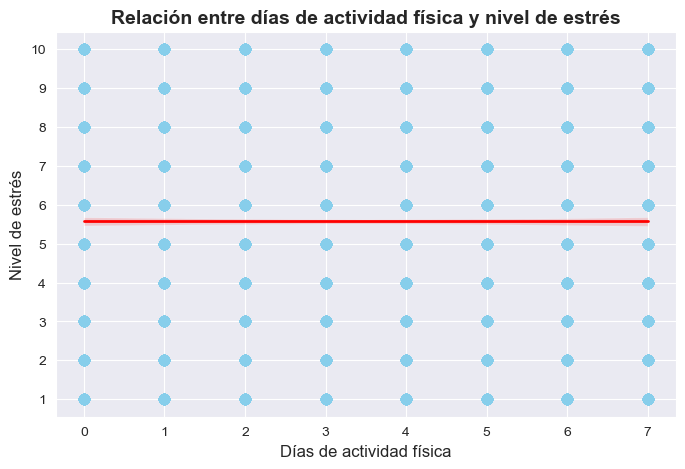

In [33]:
# Hipótesis 1
# Gráfico de Scatter Plot: Muestra la dispersión de los niveles de estrés según los días de actividad física
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")  
sns.regplot(
    data=df,
    x="physical_activity_days",
    y="stress_level",
    scatter_kws={"color":"skyblue", "s":50, "alpha":0.6},
    line_kws={"color":"red", "linewidth":2}
)
plt.title("Relación entre días de actividad física y nivel de estrés", fontsize=14, fontweight='bold')
plt.xlabel("Días de actividad física", fontsize=12)
plt.ylabel("Nivel de estrés", fontsize=12)
plt.yticks(range(1, 11))
plt.show()





In [38]:
# Hipótesis 1
# Tabla de distribución: Muestra cuántas personas hay para cada combinación de días de actividad física y nivel de estrés.
tabla = df.groupby(['physical_activity_days', 'stress_level']).size().unstack(level='stress_level', fill_value=0)
tabla.index.name = "Días de actividad física"
tabla.columns.name = "Nivel de estrés"
tabla


Nivel de estrés,1,2,3,4,5,6,7,8,9,10
Días de actividad física,,,,,,,,,,
0,122,126,114,119,122,115,116,127,124,127
1,117,141,116,119,124,131,138,121,143,133
2,113,121,132,132,128,126,127,121,120,125
3,109,121,104,126,129,136,125,122,133,139
4,137,139,122,125,109,111,112,112,124,157
5,122,111,127,134,114,126,127,129,147,139
6,123,116,113,139,139,105,134,126,121,148
7,112,137,112,133,130,115,118,137,119,115


**ANALISIS HIPOTESIS 2**  

**Se espera que las personas duerman entre 6 y 8 horas por noche.**    

Al analizar los datos se observa que la mayoría de las personas duerme entre 6 y 8 horas por noche, por lo que este rango es el más frecuente y se considera un patrón de sueño saludable en la población.


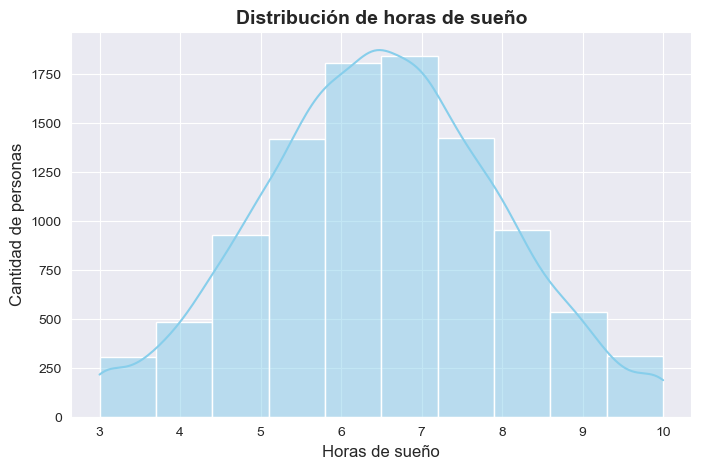

In [17]:
# Hipótesis 2
# Gráfico de Histograma: Muestra la distribución de horas de sueño en la población.
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.histplot(df['sleep_hours'], bins=10, kde=True, color="skyblue", line_kws={"color":"red"})
plt.title("Distribución de horas de sueño", fontsize=14, fontweight='bold')
plt.xlabel("Horas de sueño", fontsize=12)
plt.ylabel("Cantidad de personas", fontsize=12)
plt.show()


**ANALISIS HIPOTESIS 3**

**El nivel de ansiedad cambia según el tipo de entorno laboral.**    

Se compararon los niveles de ansiedad de cada entorno usando un boxplot y los valores centrales (mínimo, mediana, máximo, cuartiles). Los niveles de ansiedad son muy parecidos en los tres tipos de trabajo. La mediana está entre 10 y 11 y la variación dentro de cada grupo es igual, por lo que el tipo de entorno no parece afectar la ansiedad.  


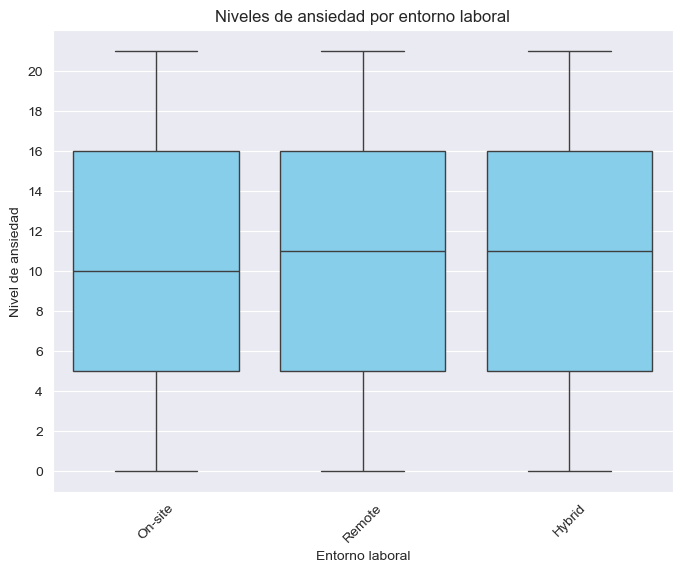

In [74]:
# Hipótesis 3
# Gráfico de Boxplot: Muestra la distribución de los niveles de ansiedad según el entorno laboral.
plt.figure(figsize=(8,6))
sns.boxplot(x="work_environment", 
            y="anxiety_score", 
            data=df,
            boxprops=dict(facecolor="skyblue")) 
plt.title("Niveles de ansiedad por entorno laboral")
plt.xlabel("Entorno laboral")
plt.ylabel("Nivel de ansiedad")
plt.xticks(rotation=45)
plt.yticks(np.arange(int(df['anxiety_score'].min()), int(df['anxiety_score'].max())+1, 2))
plt.show()


In [83]:
# Hipótesis 3
# Resumen estadístico de los niveles de ansiedad por entorno laboral
resumen = df.groupby("work_environment")["anxiety_score"].describe(
    percentiles=[0.25, 0.5, 0.75])

resumen = resumen[["min", "25%", "50%", "75%", "max"]].rename(
    columns={"25%": "Q1", "50%": "Mediana", "75%": "Q3"})

resumen["IQR"] = resumen["Q3"] - resumen["Q1"]

resumen = resumen.reset_index()

display(resumen)



,work_environment,min,Q1,Mediana,Q3,max,IQR
0,Hybrid,0.0,5.0,11.0,16.0,21.0,11.0
1,On-site,0.0,5.0,10.0,16.0,21.0,11.0
2,Remote,0.0,5.0,11.0,16.0,21.0,11.0


**ANALISIS HIPOTESIS 4**

**Se busca identificar qué variables del dataset están relacionadas con el riesgo de salud mental.**    

Se compararon los valores de distintas variables numéricas y categóricas. Ansiedad y depresión muestran una relación clara con el riesgo, mientras que las demás variables no presentan diferencias significativas.


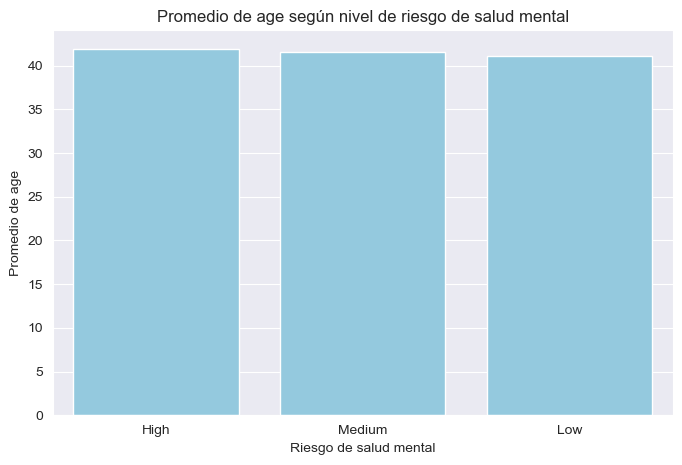

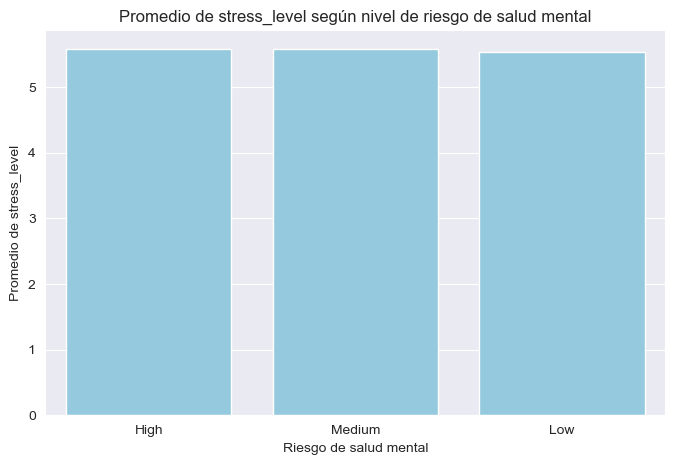

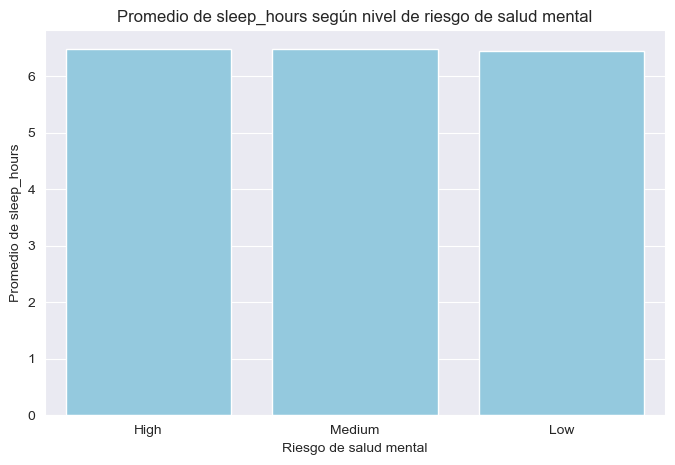

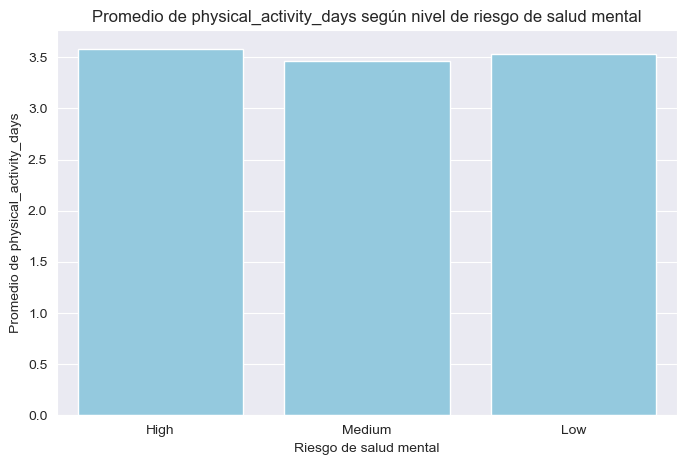

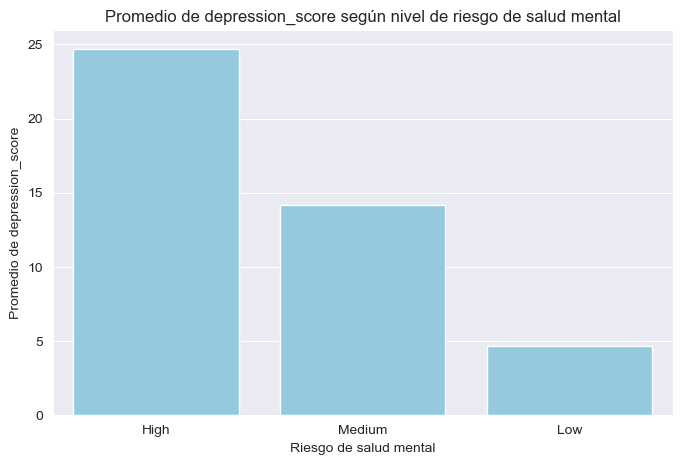

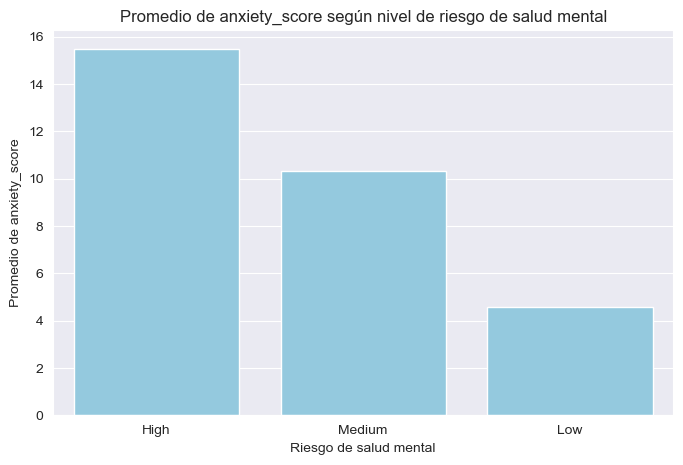

In [105]:
# Hipótesis 4
# Gráfico de barras mostrando la media de la variable por nivel de riesgo de salud mental
variables = ["age", "stress_level", "sleep_hours", "physical_activ0ity_days", "depression_score", "anxiety_score"]

for var in variables:
    plt.figure(figsize=(8,5))
    sns.barplot(
        x="mental_health_risk", 
        y=var, 
        data=df, 
        color="skyblue", 
        estimator=np.mean, 
        errorbar=None
    )
    plt.title(f"Promedio de {var} según nivel de riesgo de salud mental")
    plt.xlabel("Riesgo de salud mental")
    plt.ylabel(f"Promedio de {var}")
    plt.show()

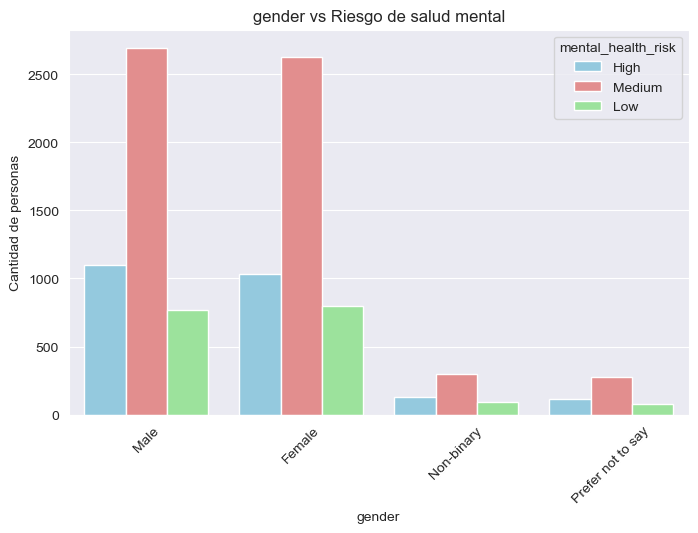

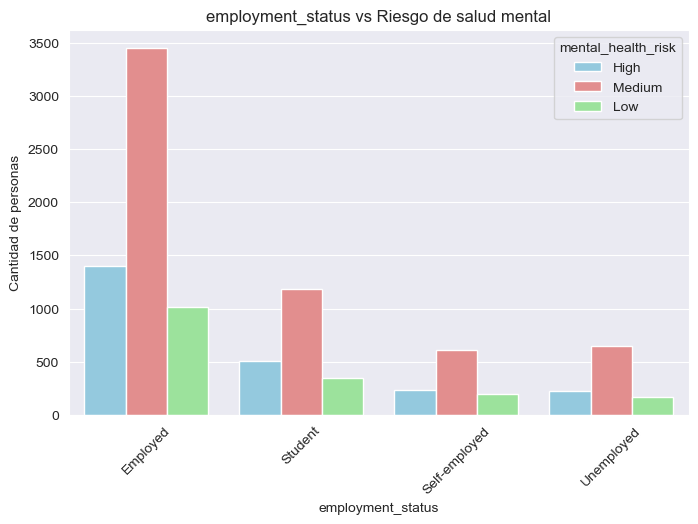

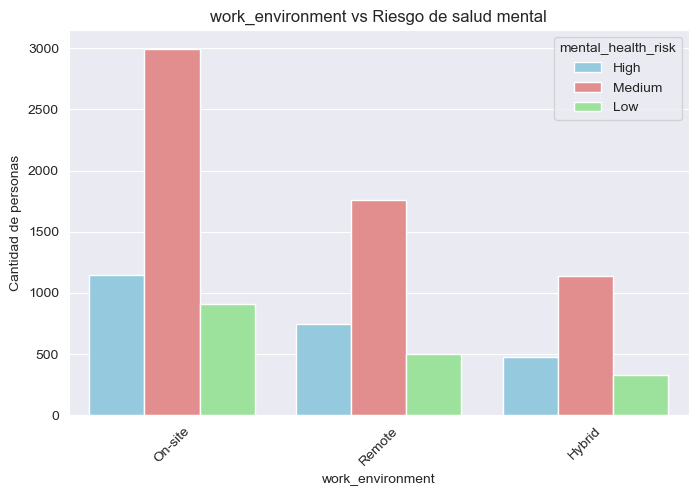

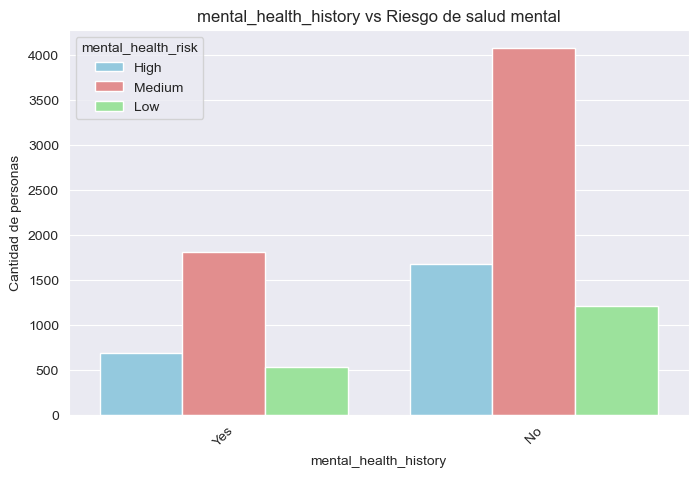

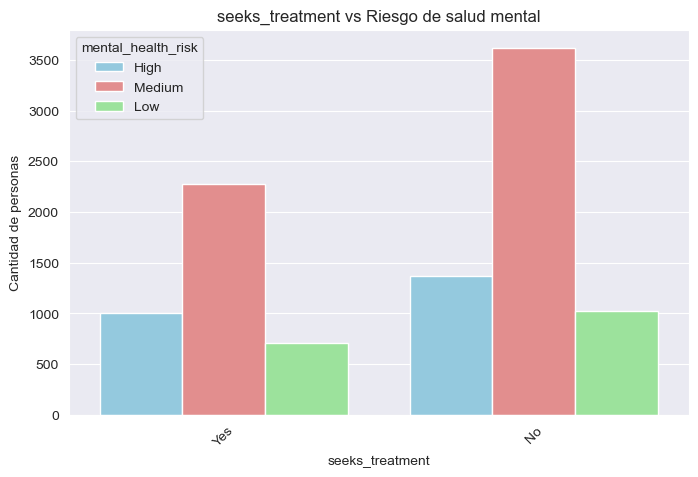

In [113]:
# Hipótesis 4
# Gráfico de barras lado a lado mostrando la distribución de niveles de riesgo de salud mental por categoría

categoricas = ["gender", "employment_status", "work_environment", "mental_health_history", "seeks_treatment"]

for var in categoricas:
    plt.figure(figsize=(8,5))
    sns.countplot(x=var, hue="mental_health_risk", data=df, palette=["skyblue","lightcoral","lightgreen"])
    plt.title(f"{var} vs Riesgo de salud mental")
    plt.xlabel(var)
    plt.ylabel("Cantidad de personas")
    plt.xticks(rotation=45)
    plt.show()


**ANALISIS HIPOTESIS 5**

  **5 - Las personas con riesgo de salud mental alto y medio buscan tratamiento con mayor frecuencia que las personas con riesgo bajo**   

Los diagramas de torta muestran que la mayoría de la población tiene riesgo medio o alto de salud mental (82.6%), pero solo 39.9% busca tratamiento. Esto indica que gran parte de quienes podrían necesitar apoyo aún no toman medidas activas para recibirlo.


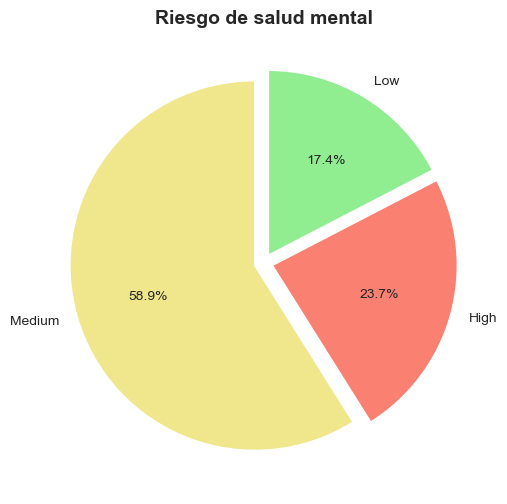

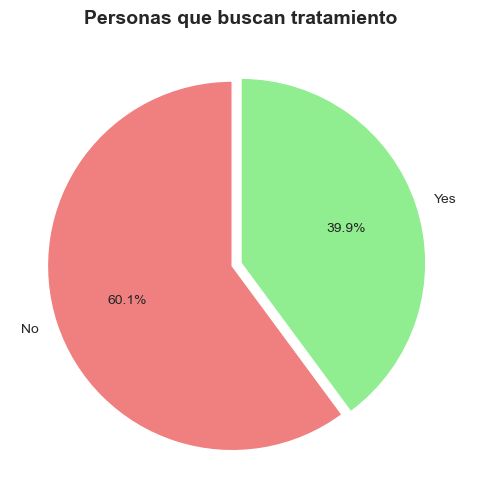

In [27]:
# Hipótesis 5
# Gráfico de tortas Riesgo de salud mental
plt.figure(figsize=(6,6))
df['mental_health_risk'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['khaki','salmon','lightgreen'],  
    explode=[0.05,0.05,0.05]
)
plt.title("Riesgo de salud mental", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

# Gráfico de torta Busca Tratamiento
plt.figure(figsize=(6,6))
df['seeks_treatment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral','lightgreen'],  
    explode=[0.05,0]
)
plt.title("Personas que buscan tratamiento", fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

